In [ ]:
'''@Author: Subhadeep Bej'''

In [2]:
# Uncomment the following line only if you are using Jupyter notebooks
#%matplotlib notebook 

<IPython.core.display.Javascript object>


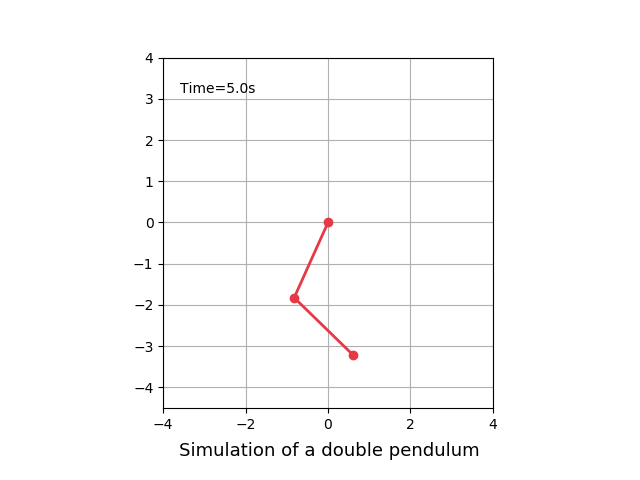

In [3]:
import numpy as np
from numpy import sin, cos
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.animation as animation

G, L1, L2, M1, M2 = 9.8, 2.0, 2.0, 1.0, 1.0  


dt = 0.005                
t = np.arange(0, 40, dt)   # Time steps at which we're going to calculate theta1, theta2 

# Intial Conditions

theta1 = 120.0 
omega1 = 0.0 
theta2 = -10.0
omega2 = 0.0

# initial state
initial_state = np.radians([theta1, omega1, theta2, omega2])  # Converting angles in degrees to radians

def derivs(state, t):   # returns [theta1_dot/omega1, theta1_double_dot, theta2_dot/omega2, theta2_double_dot]
  
    d = np.zeros_like(state) # array of zeroes with the same shape as of the variable 'state'
    d[0] = state[1] #theta1_dot

    delta = state[2] - state[0]  #theta2 - theta1
    
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    
    # Writing the eqn for theta1_doubledot
    d[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
               / den1)

    d[2] = state[3] #theta2_dot

    den2 = (L2/L1) * den1
    
    # Writing  the eqn for theta2_doubledot
    d[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
               / den2)

    return d



# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, initial_state, t)

x1 = L1*sin(y[:, 0])   # Values of x1 for each solution of theta1
y1 = -L1*cos(y[:, 0])  # Values of y1 

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1


fig, ax = plt.subplots(subplot_kw= {'xlim' : (-4, 4), 'ylim' :(-4.5, 4)})
ax.grid()
ax.set_aspect('equal')

line, = ax.plot([], [], 'o-', lw=2, color='#e63946')   # drawing a line
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
line.set_data([], [])
time_text.set_text('')



def animate(i):
    x_value = [0, x1[i], x2[i]]    # x-values of origin, bob of mass M1, bob of mass M2
    y_value = [0, y1[i], y2[i]]    # y-values of origin, bob of mass M1, bob of mass M2

    line.set_data(x_value, y_value)
    time_text.set_text( f'Time={i*dt:0.1f}s')              
    return line, time_text


ani = animation.FuncAnimation(fig, animate, range(1, len(y), 2),
                              interval=dt*700,  blit=True)
ax.annotate(s = "Simulation of a double pendulum", xy=(0.28, 0.05), xycoords='figure fraction', fontsize=13);
plt.subplots_adjust(bottom=0.15)
plt.show()
# ani.save('simulation_double_pendulum.mp4', fps=120) # Saving the animation

<IPython.core.display.Javascript object>


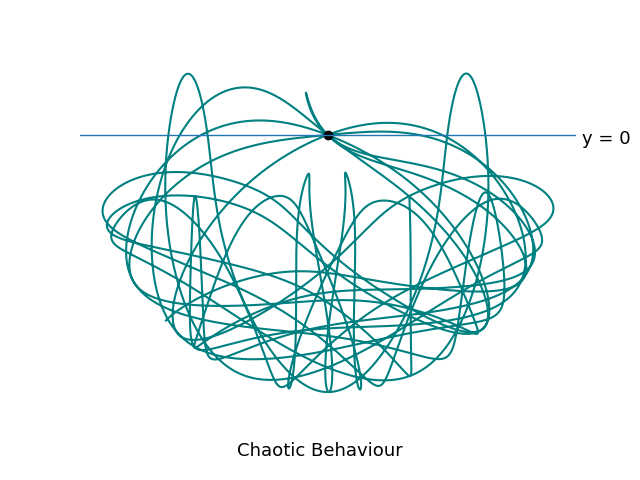

In [4]:

# Plotting the trajectory of the bob of mass M2

fig, ax = plt.subplots()

  
ax.plot(x2, y2, 'teal')
ax.plot(0, 0, 'o', ms = 6, color='black')
ax.axhline(0,  linewidth=1)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
ax.tick_params(labelleft=False, left = False, bottom = False, labelbottom = False)

for spine in ax.spines.values():
    spine.set_visible(False)
    
ax.annotate(s = "Chaotic Behaviour", xy=(0.37, 0.05), xycoords='figure fraction', fontsize=13);
ax.annotate(s = "y = 0", xy=(0.91, 0.70), xycoords='figure fraction', fontsize=13);
plt.subplots_adjust(bottom=0.15)
plt.show()
# plt.savefig('chaotic behaviour wt-spines.png')

<IPython.core.display.Javascript object>


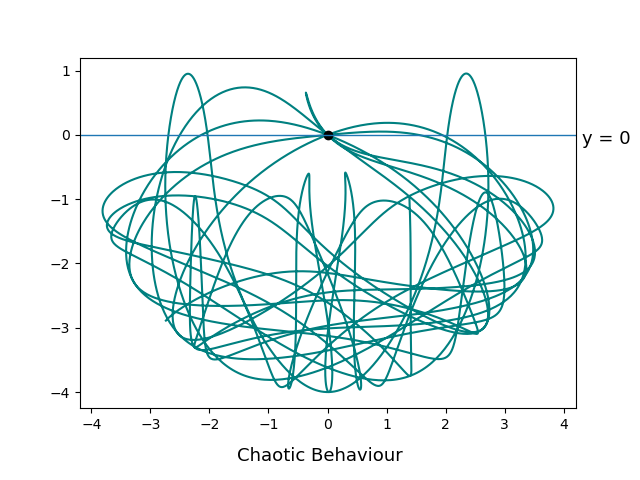

In [5]:
fig, ax = plt.subplots()

  
ax.plot(x2, y2, 'teal')
ax.plot(0, 0, 'o', ms = 6, color='black')
ax.axhline(0,  linewidth=1)

    
ax.annotate(s = "Chaotic Behaviour", xy=(0.37, 0.04), xycoords='figure fraction', fontsize=13)
ax.annotate(s = "y = 0", xy=(0.91, 0.70), xycoords='figure fraction', fontsize=13)
plt.subplots_adjust(bottom = 0.15)
plt.show()
# plt.savefig('chaotic behaviour.png')